## Grenoble INP - La Prépa - 2023-2024
## Informatique 1A
# Rendu du TPL1 : Calcul de la fonction sinus par sa série de Taylor

## Nom et prénom : MAMOUN Salma
## Groupe : C

## Introduction:
   - Dans ce TP, l'objectif est de définir une fonction permettant d'obtenir des approximation de la fonction sinus en utilisant la série de Taylor ainsi que  quelques propriétés de la fonctions .

### - sin1 : La première version de notre fonction sinus
Cette version calcule la valeur se sin en utilisant la série de Taylor pour un x réel quelquonque.

                                        Cellule du calcule de sin1 :

In [31]:
from math import pi

def sin1(x):
    
    N = 7 # on peut varier la valeur de N , mais en général on obtient
          # une bonne approximation pour des valeurs raisonable de N car la série converge rapidement au voisinnage de 0
    produit = 1 
    somme = 0
    
    for n in range(0,N+1) : #boucle qui sert à calculer notre somme décrite par la série de Taylor
        
        k = 2*n + 1 # c'est pas essentiel d'introduire une telle variable , c'est juste pour pouvoir recycler mon code plus tard
        for i in range(0,k+1) :# Cette boucle sert à calculer la factorielle dedans la série de Taylor, (2n+1)!
            if i == 0 : # cette disjonction des cas est importante ,  car si on remplace i par 0 dans
                        # notre calcul de la factorielle on obtient 0!=0 ce qui n'est le cas
                produit = 1
            else :
                produit = produit * i
       
        somme = somme + ( (-1)**n ) * ( ( x**k ) / produit ) # calcul de ce terme pour chaque n et l'ajout à la somme  précédente 
        
    return somme

                                                        Tests :

In [32]:
from math import pi
from math import sqrt


assert( sin1(0) == 0 )
assert( sin1(pi/2) - 1 <= 1e-15 )
assert( sin1(pi/3) - (sqrt(3)/2) <= 1e-15 ) 
assert( sin1(pi/4) - (sqrt(2)/2) <= 1e-15 ) 
assert( sin1(pi/6) - (1/2) <= 1e-15 ) 
assert( sin1(11*pi/6) - (1/2) <= 1e-15 )


print("OK")

OK


D'après la cellule 'Tests', on voit bien que notre code nous donne des valeurs avec un bonne précision qui est de e-15 .


                                  Representation graphique de sin1 et de math.sin :

In [33]:
# Cellule qui sert à rendre nos graphes jolis
import numpy as np


def setup_trigo_axis(plt, subplt, xmin, xmax):
    subplt.grid()
    subplt.spines['left'].set_position(('data', 0))
    subplt.spines['bottom'].set_position(('data', 0))

    if xmax - xmin < np.pi:
        # We wouldn't see any tick if we had one tick every pi/2
        return

    if xmax - xmin > 15 * np.pi:
        # Don't compute a uselessly large number of tick
        return
    ticks = [0.]
    labels = ["$0$"]
    
    def str_or_empty(n):
        if n == 1:
            return ""
        else:
            return str(n)
    
    n = 1
    while n*np.pi < xmax:
        ticks.append((n-.5)*np.pi)
        labels.append(r"$\frac{"+str(2*n-1)+"}{2}\pi$")
    
        ticks.append(n*np.pi)
        labels.append(r"$"+str_or_empty(n)+"\pi$")
        n = n + 1
    
    n = -1
    while n*np.pi > xmin:
        ticks.append((n+.5)*np.pi)
        labels.append(r"$-\frac{"+str(-2*n-1)+"}{2}\pi$")
    
        ticks.append(n*np.pi)
        labels.append(r"-$"+str_or_empty(-n)+"\pi$")
        n = n - 1
    
    plt.setp(subplt, xticks=ticks, xticklabels=labels)

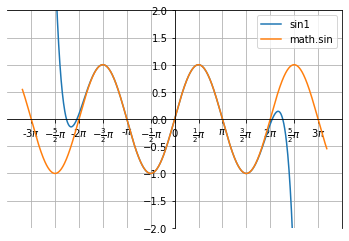

In [34]:
import numpy
import math
import matplotlib.pyplot
#from plot_axis import setup_trigo_axis

xmax = 10
xmin = -10

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin1, x))
lib = list(map(math.sin, x))
ax = matplotlib.pyplot.axes()
matplotlib.pyplot.ylim([-2, 2])

setup_trigo_axis(matplotlib.pyplot, ax , xmin, xmax)

matplotlib.pyplot.plot(x, ours1, label='sin1')
matplotlib.pyplot.plot(x, lib, label='math.sin')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

On remarque d'après le graph, que les deux courbes sont trés proches 'presque confondues' sur l'itervalle [-2pi,2pi] , mais elles divergent pour des valeurs en dehors de cet intervalle. 
Pour bien visualiser assez finement  la marge d'erreur on tracera deux courbes une sur l'echelle logarithmique et l'autre sur l'echelle linéaire .

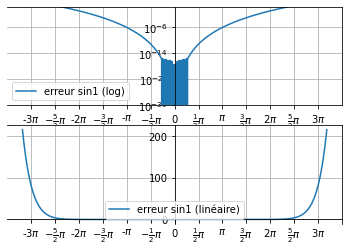

In [35]:
import numpy
import math
import matplotlib.pyplot as plt

def sin1_erreur(n):
    return abs(sin1(n) - math.sin(n))


xmin = -10
xmax = 10
ymax = 2

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin1_erreur, x))


fig, ax = plt.subplots(nrows=2, ncols=1)
log = plt.subplot(211)
plt.ylim([1e-30, ymax])
setup_trigo_axis(plt, log, xmin, xmax)

log.spines['bottom'].set_position(('axes', 0))
log.set_yscale('log')

plt.plot(x, ours1, label='erreur sin1 (log)')


plt.legend()

lin = plt.subplot(212)
setup_trigo_axis(plt, lin, xmin, xmax)

plt.plot(x, ours1, label='erreur sin1 (linéaire)')

plt.legend()

plt.show()


Les deux courbes affirme que notre approximation est plus précise sur un certain intervalle .

### - sin2 : L a deuxiémeversion de sin1 réduite sur [0,pi/2]
On cherche à obtenir une meilleure précision.

                                            Cellule du calcul de sin2 :

In [36]:
def sin2(x):
   
    signe = 1
    if x < 0: # pour se limiter dans des x positifs
        x = - x
        signe  = - signe
        
    if x > (2*pi) : # pour se limiter aux x dans l'intervalle [0,2pi]
        x = x % (2*pi)
        signe =  signe
        
            
    if x > (pi)  : # pour se limiter aux x dans l'intervalle [0,pi]
        x = x % (pi)
        signe = - signe
        
    
    if x > (pi/2)  : # pour se limiter dans l'intrvalle [0,pi/2]
            x = x % (pi/2)
            signe = signe
    
    
    return signe*sin1(x)


                                                        Tests :

In [37]:
from math import pi
from math import sqrt
# On a pris des valeurs sup à 2pi pour bien vérifier notre code
assert( sin2(0) == 0 )
assert( sin2(80*pi/2) - 1 <= 1e-15 )
assert( sin2(13*pi/6) - (1/2) <= 1e-15  ) 
assert( sin2(21*pi/4) - (sqrt(2)/2) )
assert( sin2(25*pi/4) + (sqrt(2)/2) )
assert( sin2(27*pi/4) + (sqrt(2)/2) )


print("OK")

OK


                                  Representation graphique de sin2 et de math.sin :

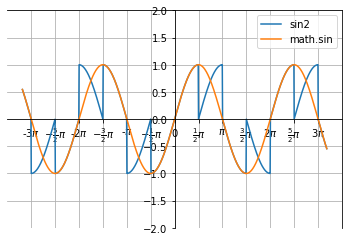

In [38]:
import numpy
import math
import matplotlib.pyplot
#from plot_axis import setup_trigo_axis

xmax = 10
xmin = -10

x = numpy.linspace(xmin, xmax, num=1000)
ours2 = list(map(sin2, x))
lib = list(map(math.sin, x))
ax = matplotlib.pyplot.axes()
matplotlib.pyplot.ylim([-2, 2])

setup_trigo_axis(matplotlib.pyplot, ax , xmin, xmax)

matplotlib.pyplot.plot(x, ours2, label='sin2')
matplotlib.pyplot.plot(x, lib, label='math.sin')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

On voit que sin2 est beaucoup plus mieux que sin1.

On remarque que notre fonction donne une trés bonne précision sur les intervalle [2k*pi , pi/2 + 2k*pi] ( avec k un entier relatif), mais ça marche pas très bien pour les autres intervalles!

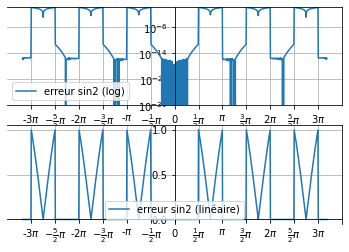

In [39]:
def sin2_erreur(n):
    return abs(sin2(n) - math.sin(n))


xmin = -10
xmax = 10
ymax = 2

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin2_erreur, x))


fig, ax = plt.subplots(nrows=2, ncols=1)
log = plt.subplot(211)
plt.ylim([1e-30, ymax])
setup_trigo_axis(plt, log, xmin, xmax)

log.spines['bottom'].set_position(('axes', 0))
log.set_yscale('log')

plt.plot(x, ours1, label='erreur sin2 (log)')


plt.legend()

lin = plt.subplot(212)
setup_trigo_axis(plt, lin, xmin, xmax)

plt.plot(x, ours1, label='erreur sin2 (linéaire)')

plt.legend()

plt.show()


On voit bien que la courbes d'erreur(log) oscillent autour de 0 (des ordonnées) pour les valeurs des intervalles  [2k*pi , pi/2 + 2k*pi] ( avec k un entier relatif). Ce qui signifie la fonction sin2 est très proche mais n'est pas tout à fait identique à la fonction math.sin .
Au contraire,  la courbe présente des tendances constantes (des augmentations ou des diminutions progressives). Ce qui signifie qu'il y a un écart constant entre les deux fonctions pour les autres intervalles.

#### Cellule calculant le cos ent utlisant la série de taylor :

In [40]:
def cos1(y):
    
 #Je vais recycler mon premier code de sin 1 en remplaçons k par 2n et x par y
    N = 7 
    produit = 1 
    somme = 0
    
    for n in range(0,N+1) : 
        
        k = 2*n + 1 
        for i in range(0,k+1) :
            if i == 0 :
                produit = 1
            else :
                produit = produit * i
       
        somme = somme + ( (-1)**n ) * ( ( y**k ) / produit )
    
    return somme

    return y

### - sin3 : la fct  qui calcule le sin en usilisant le cos

In [41]:
def sin3(x):
      
    signe = 1
    if x < 0: # pour se limiter dans des x positifs
        x = - x
        signe  = - signe
        
    if x > (2*pi) : # pour se limiter aux x dans l'intervalle [0,2pi]
        x = x % (2*pi)
        signe =  signe

            
    if x > (pi)  : # pour se limiter aux x dans l'intervalle [0,pi]
        x = x % (pi)
        signe = - signe
        
    
    if x > (pi/2)  : # pour se limiter dans l'intrvalle [0,pi/2]
            x = x % (pi/2)
            signe = signe


# on utilesera la prop suivante :  sin(pi/2 - x) = cos(x)
    
    y = pi/2 - x 
    return signe * cos1(y)

                                                        Tests :

In [42]:
from math import pi
from math import sqrt
# On a pris des valeurs sup à 2pi pour bien vérifier notre code

assert( sin3(80*pi/2) - 1 <= 1e-15 )
assert( sin3(21*pi/4) - (sqrt(2)/2) )
assert( sin3(25*pi/4) + (sqrt(2)/2) )
assert( sin3(27*pi/4) + (sqrt(2)/2) )




print("OK")

OK


                                  Representation graphique de sin3 et de math.sin :

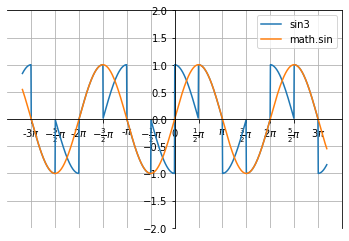

In [43]:
import numpy
import math
import matplotlib.pyplot
#from plot_axis import setup_trigo_axis

xmax = 10
xmin = -10

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin3, x))
lib = list(map(math.sin, x))
ax = matplotlib.pyplot.axes()
matplotlib.pyplot.ylim([-2, 2])

setup_trigo_axis(matplotlib.pyplot, ax , xmin, xmax)

matplotlib.pyplot.plot(x, ours1, label='sin3')
matplotlib.pyplot.plot(x, lib, label='math.sin')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()

On remarque que au contraire de la fct sin2 , la fonction sin3 donne une trés bonne précision sur les intervalles
[pi/2 + 2k*pi , (2k+1)*pi] ( avec k un entier relatif), mais ça marche pas trés bien pour les autres intervalles 
( càd [2k*pi , pi/2 + 2k*pi] ).

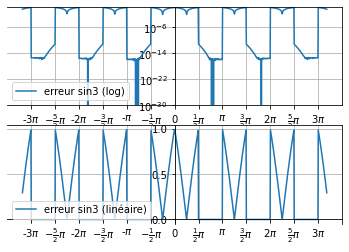

In [44]:
def sin3_erreur(n):
    return abs(sin3(n) - math.sin(n))


xmin = -10
xmax = 10
ymax = 2

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin3_erreur, x))


fig, ax = plt.subplots(nrows=2, ncols=1)
log = plt.subplot(211)
plt.ylim([1e-30, ymax])
setup_trigo_axis(plt, log, xmin, xmax)

log.spines['bottom'].set_position(('axes', 0))
log.set_yscale('log')

plt.plot(x, ours1, label='erreur sin3 (log)')


plt.legend()

lin = plt.subplot(212)
setup_trigo_axis(plt, lin, xmin, xmax)

plt.plot(x, ours1, label='erreur sin3 (linéaire)')

plt.legend()

plt.show()


 Onvoit bien que la courbes d'erreur(log) oscillent autour de 0 (des ordonnées) pour les valeurs des intervalles  [pi/2 +2k*pi ,(2k+1)*pi] ( avec k un entier relatif). Ce qui signifie la fonction sin2 est très proche mais n'est pas tout à fait identique à la fonction math.sin .
 Au contraire,  la courbe présente des tendances constantes (des augmentations ou des diminutions progressives). Ce qui signifie qu'il y a un écart constant entre les deux fonctions pour les autres intervalles.

### -sin4 : la meilleure version
on remarque que la fonction sin2 nous donne un bon graphe pour les intervalles [0,pi/2],[pi/3pi/2]....
et la fonction sin3 nous donne un bon graphe pour les intervalles [pi/2,pi],[3pi/2pi],....
On peut dire donc que les deux fonctions sont 'complémentaires'
Alors on va définr une dérnière fonction sin4 qui va associer les deux fonctions pour nous donner les bon résultats sur R tout entier.


In [45]:
def sin4(x) :
    
    signe = 1
    if x < 0: # pour se limiter dans des x positifs
        x = - x
        signe  = - signe
        
    if x > (2*pi) : # pour se limiter aux x dans l'intervalle [0,2pi]
        x = x % (2*pi)
        signe =  signe
        
            
    if x > (pi)  : # pour se limiter aux x dans l'intervalle [0,pi]
        x = x % (pi)
        signe = - signe
        
    
    if x < (pi/2)  : # les x dans [0,pi/2] 
            x = x % (pi/2)
            signe = signe
    return signe*sin1(x)
    
    if x > (pi/2) : # les x dans [0,pi]
        y = pi/2 - x
    return signe * cos1(y)

                                                  Tests :

In [46]:
from math import pi
from math import sqrt
# On a pris des valeurs sup à 2pi pour bien vérifier notre code

assert( sin3(80*pi/2) - 1 <= 1e-15 )
assert( sin3(21*pi/4) - (sqrt(2)/2) )
assert( sin3(25*pi/4) + (sqrt(2)/2) )
assert( sin3(27*pi/4) + (sqrt(2)/2) )




print("OK")

OK


                                  Representation graphique de sin4 et de math.sin :

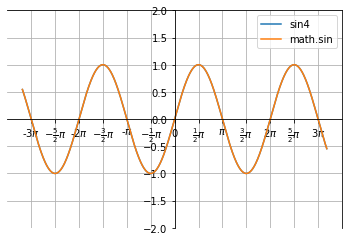

In [47]:
import numpy
import math
import matplotlib.pyplot
#from plot_axis import setup_trigo_axis

xmax = 10
xmin = -10

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin4, x))
lib = list(map(math.sin, x))
ax = matplotlib.pyplot.axes()
matplotlib.pyplot.ylim([-2, 2])

setup_trigo_axis(matplotlib.pyplot, ax , xmin, xmax)

matplotlib.pyplot.plot(x, ours1, label='sin4')
matplotlib.pyplot.plot(x, lib, label='math.sin')
matplotlib.pyplot.legend()
matplotlib.pyplot.show() 

Tadaa!! 
On voit bien que le graphe se la version sin4 est confondu avec celui de la fct math.sin

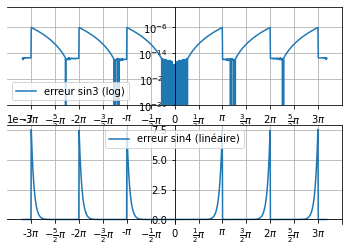

In [48]:
def sin4_erreur(n):
    return abs(sin4(n) - math.sin(n))


xmin = -10
xmax = 10
ymax = 2

x = numpy.linspace(xmin, xmax, num=1000)
ours1 = list(map(sin4_erreur, x))


fig, ax = plt.subplots(nrows=2, ncols=1)
log = plt.subplot(211)
plt.ylim([1e-30, ymax])
setup_trigo_axis(plt, log, xmin, xmax)

log.spines['bottom'].set_position(('axes', 0))
log.set_yscale('log')

plt.plot(x, ours1, label='erreur sin3 (log)')


plt.legend()

lin = plt.subplot(212)
setup_trigo_axis(plt, lin, xmin, xmax)

plt.plot(x, ours1, label='erreur sin4 (linéaire)')

plt.legend()

plt.show()


On voit bien que la marge d'erreur est trés petite mais négligeable par rapport aux autres versions 

## Conclusion:
L'ensemble des courbes qu'on a tracées pour les différentes versions de la fct sinus, nous ont bien montrées que la série de Taylor donne une bonne approximation de la fonction sinus surtout au voisinnage de 0. 